In [122]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [123]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [151]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, and_

In [125]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [126]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [127]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [128]:
# Save references to each table
Measure =Base.classes.measurement
Station =Base.classes.station

In [129]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [130]:
# Find the most recent date in the data set.
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = session.query(Measure.date).order_by(Measure.date.desc()).first().date
recent_date = dt.datetime.strptime(most_recent, '%Y-%m-%d')

In [135]:
# Calculate the date one year from the last date in data set.
one_year_earlier = recent_date-dt.timedelta(days=365)

results = session.query(Measure.date, Measure.prcp).filter(Measure.date >= one_year_earlier)

In [136]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
names=['Date', 'Precipitation']
rain_df = pd.DataFrame(columns=names) 
rain = session.query(Measure.date, Measure.prcp).filter(Measure.date >= one_year_earlier).all()
rain_df = pd.DataFrame(rain, columns = names)
#rain_df.set_index('Date', inplace=True)

[Text(-500.0, 0, '2017-03-11'),
 Text(0.0, 0, '2016-08-24'),
 Text(500.0, 0, '2017-01-11'),
 Text(1000.0, 0, '2017-08-17'),
 Text(1500.0, 0, '2017-07-27'),
 Text(2000.0, 0, '2016-12-31'),
 Text(2500.0, 0, '')]

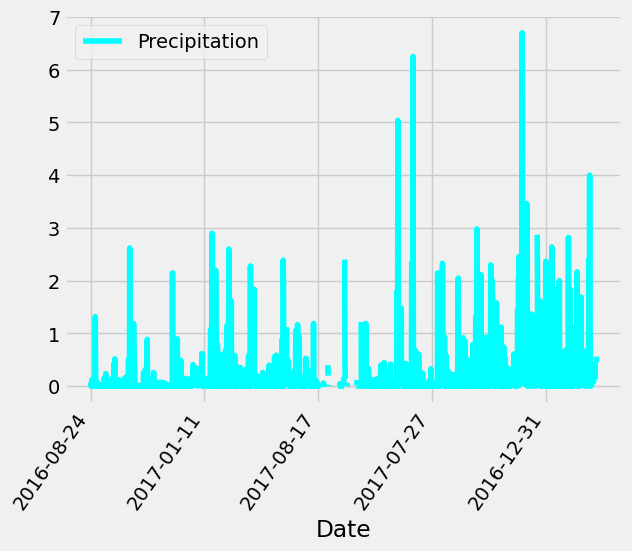

In [137]:
# Sort the dataframe by date
rain_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data

plot = rain_df.plot(x='Date', y='Precipitation', kind='line', color='aqua', label='Precipitation')
plot.set_xticklabels(plot.get_xticklabels(), rotation=55, ha='right')


In [138]:
# Use Pandas to calculate the summary statistics for the precipitation data

rain_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [141]:

session.query(func.count(Station.station)).all()


[(9,)]

In [148]:
list_stations = (
    session.query(
    Measure.station, func.count(
    Measure.station)).group_by(
    Measure.station).order_by(
    desc(func.count(Measure.station))).all()
)

most_active = (list_stations[0][0])

In [149]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
(
    session.query(
        func.min(Measure.tobs).label('lowest_temperature'),
        func.max(Measure.tobs).label('highest_temperature'),
        func.avg(Measure.tobs).label('average_temperature')
    )
    .filter(Measure.station == most_active)
    .all()
)

[(54.0, 85.0, 71.66378066378067)]

In [154]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_last_year = (
    session.query(Measure.date, Measure.tobs)
    .filter(and_(Measure.station == most_active, Measure.date >= one_year_earlier, Measure.date <= most_recent))
    .all()
)


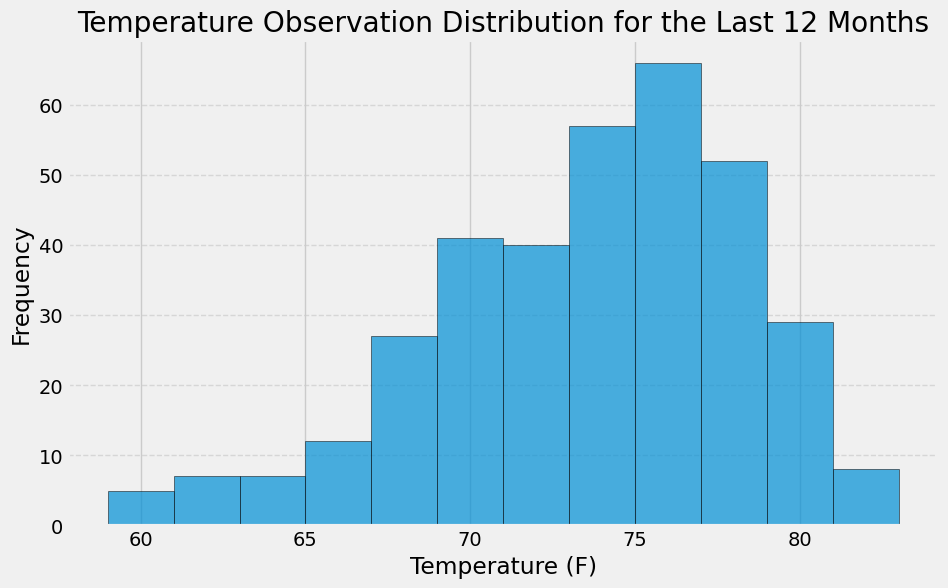

In [157]:
df_temperature = pd.DataFrame(most_active_last_year, columns=['Date', 'Temperature'])

plt.figure(figsize=(10, 6))
plt.hist(df_temperature['Temperature'], bins=12, edgecolor='black', alpha=0.7)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Distribution for the Last 12 Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Close Session

In [158]:
# Close Session
session.close()